<a href="https://colab.research.google.com/github/vilmarprado/mack_ling_prog_cie_dados/blob/main/LP_T7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">

<br>
<br>

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Ciência de Dados </b></font></h1>
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"><b>Paradigmas de Linguagens de
Programação para Ciência de Dados</b></font></h1>

# Exercício T7


### Vilmar Prado do Nascimento

<br>
<br>

---


# Analise dados sobre desenvolvimento



<img src="https://www.gapminder.org/wp-content/themes/gapminder2/images/gapminder-logo.svg" width=300>  



Aqui você vai empregar uma base de dados da [gapminder](https://www.gapminder.org/) com informações de vários índices de desenvolvimento dos países ao longo do tempo. Empregue esses dados, e o que você aprendeu sobre `R` para implementar uma análise desses dados de desenvolvimento trazendo *insights* relevantes sobre esse tema, a exemplo do que você fez na atividade anterior em `Python`.



Empregue a base `gapminder` a seguir e **implemente**:

* **Ao menos duas visualizações de dados (gráficos)**

que tragam *insights* valiosos e relevantes sobre o desenvolvimento dos países. **Para cada uma faça um pequeno parágrafo, 4-5 linhas, compartilhando sua análise e conclusões**.

In [97]:
# ESTE É UM NOTEBOOK EM R

data = read.csv('https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/raw/main/data/Life_Expectancy_Data.csv')
head(data)

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
4,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
6,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


## Referências úteis para este Lab

Você pode acessar soluções na internet, mas tenha certeza de que os códigos que encontrar façam sentido para você.

Você também pode achar útil e fácil consultar, além das notas de aula as seguintes referências:

* [Quick-R](https://www.statmethods.net/)
* [R Tutorial](https://www.r-tutor.com/)
* [R for Data Science](https://r4ds.had.co.nz/)


# Seu Código aqui.

In [110]:
# Seu código
install.packages("installr")
library(installr)
library(dplyr)
library(ggplot2)
library("scales")
library(tidyr)
str(data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	2938 obs. of  22 variables:
 $ Country                        : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                           : int  2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 ...
 $ Status                         : chr  "Developing" "Developing" "Developing" "Developing" ...
 $ Life.expectancy                : num  65 59.9 59.9 59.5 59.2 58.8 58.6 58.1 57.5 57.3 ...
 $ Adult.Mortality                : num  263 271 268 272 275 279 281 287 295 295 ...
 $ infant.deaths                  : int  62 64 66 69 71 74 77 80 82 84 ...
 $ Alcohol                        : num  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.03 0.02 0.03 ...
 $ percentage.expenditure         : num  71.3 73.5 73.2 78.2 7.1 ...
 $ Hepatitis.B                    : num  65 62 64 67 68 66 63 64 63 64 ...
 $ Measles                        : int  1154 492 430 2787 3013 1989 2861 1599 1141 1990 ...
 $ BMI                            : num  19.1 18.6 18.1 17.6 17.2 16.7 16.2 15.7

In [111]:
# 'Saudi Arabia', 'Argentina', 'Egypt', 'United Arab Emirates', 'Ethiopia','Iran' - Países que fram parte do BRICS a partir de 2024 - Não serão pesquisados
df_paises_pesquisados<-c('Brazil', 'China', 'India','South Africa','Russia') # Países que fazem parte do BRICS que serão pesquisados
df_paises<-data%>%
           filter(Country%in%df_paises_pesquisados) %>%
           select(Country, Year, Status, Life.expectancy, Adult.Mortality, infant.deaths, Alcohol, Schooling, GDP, Population, BMI)%>%
           mutate(Proporcao_Morte_Adulto = Adult.Mortality/10000)  %>%
           mutate(Proporcao_Morte_Infantil = infant.deaths/10000)

In [112]:

# Alterando valores com NA para zero no data frame
df_paises[is.na(df_paises)] = 0

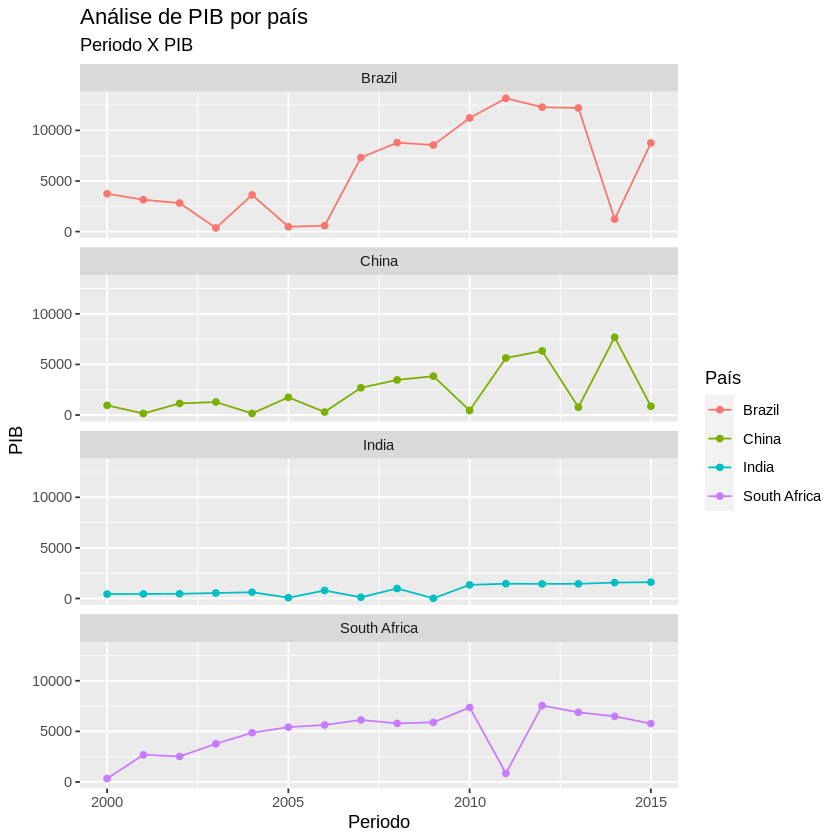

In [113]:
  # Exibindo o gráfico do PIB dos países do BRICS
  ggplot(df_paises) +
  geom_point(aes(x = Year, y = GDP, group = Country, col = Country))+
  geom_line(aes(x = Year, y = GDP, group = Country, col = Country))+
  ggtitle("Análise de PIB por país", subtitle="Periodo X PIB") +
  xlab("Periodo") +
  ylab("PIB") +
  scale_color_discrete(name = "País")+
 facet_wrap(~Country, nrow = 5)

A pesquisa foi realizada no período de 2000 a 2015. Existem dados de PIB faltando em alguns anos, mas o Brasil apresenta o maior PIB entre os 4 países que aparece na pesquisa. Não há dados da Russia na tabela disponibilizada.

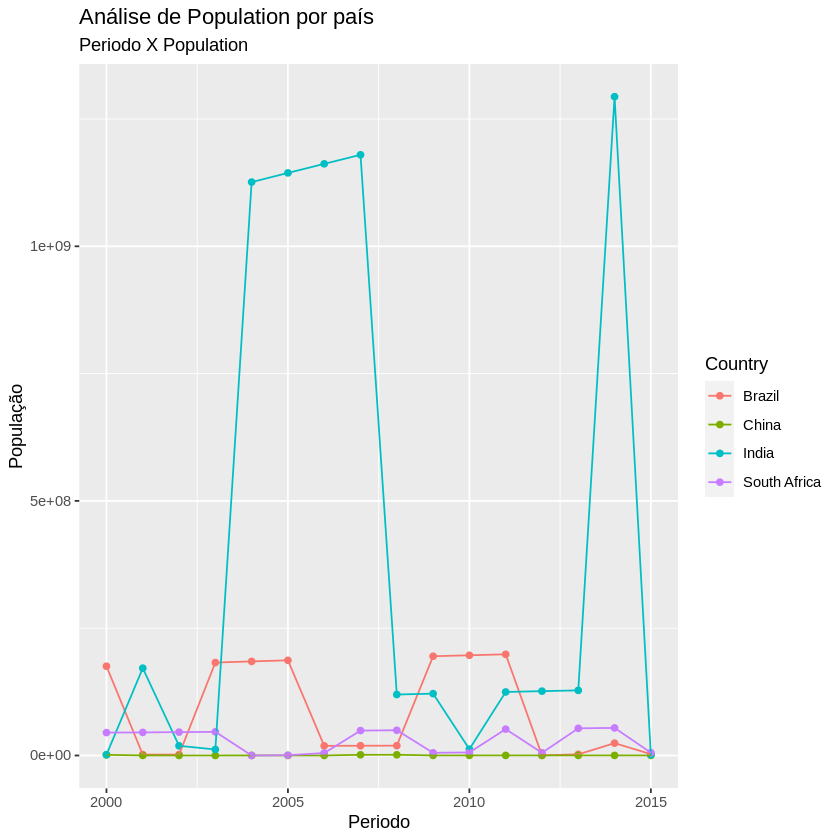

In [114]:
# Exibindo gráfico com a população dos países do BRICS
ggplot(df_paises) +
  geom_point(aes(x = Year, y = Population, group = Country, col = Country))+
  geom_line(aes(x = Year, y = Population, group = Country, col = Country))+
  ggtitle("Análise de Population por país", subtitle="Periodo X Population") +
  xlab("Periodo") +
  ylab("População")

No gráfico acima está faltando alguns dados no data frame. A China não tem cadastrada a população em nenhum dos anos, neste caso, a India a presenta a maior população na tabela disponibilizada.

In [121]:
df_pivot<-df_paises%>%
          select(Country, Year, Life.expectancy)%>%
          pivot_wider(names_from = Year,
                      values_from = Life.expectancy)
df_pivot

Country,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Brazil,75.0,74.8,74.7,74.5,74.1,73.8,73.6,73.4,73.3,73.0,72.7,72.0,71.8,71.4,71.0,75.0
China,76.1,75.8,75.6,75.4,75.2,75.0,74.9,74.5,74.4,74.2,73.9,73.5,73.1,72.7,72.2,71.7
India,68.3,68.0,67.6,67.3,66.8,66.4,66.0,65.5,65.2,64.8,64.4,64.0,63.7,63.3,62.9,62.5
South Africa,62.9,62.0,69.0,59.2,58.9,58.0,56.5,55.3,54.5,54.0,53.8,53.7,54.0,54.9,56.0,57.3


Na tabela acima é apresentado numericamente a expectativa de vida por período e pais. Pode ser melhor visualizado no gráfico abaixo

Warning message:
“Using size for a discrete variable is not advised.”


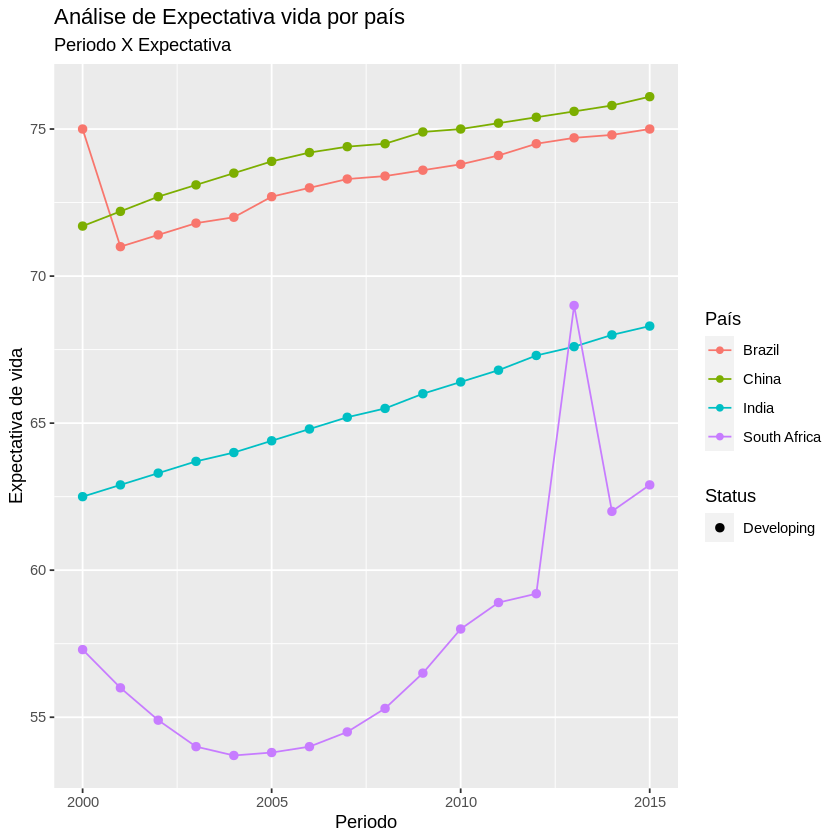

In [115]:
  # Apresentação do gráfico com a expectativa de vida
  ggplot(df_paises) +
  geom_line(aes(x = Year, y = Life.expectancy, group = Country, col = Country))+
  geom_point(aes(x = Year, y = Life.expectancy, group = Country, col = Country, size = Status))+
  ggtitle("Análise de Expectativa vida por país", subtitle="Periodo X Expectativa") +
  xlab("Periodo") +
  ylab("Expectativa de vida") +
  scale_color_discrete(name = "País")

No gráfico a expectativa de vida a maior é o do China e a menor é a da Africa do Sul. O Brasil apresenta a segunda maior expectativa de vida, nos países analisados do BRICS. Nos 4 (quatro) países análisados há um crescimento na expectativa de vida.

Warning message:
“Using size for a discrete variable is not advised.”


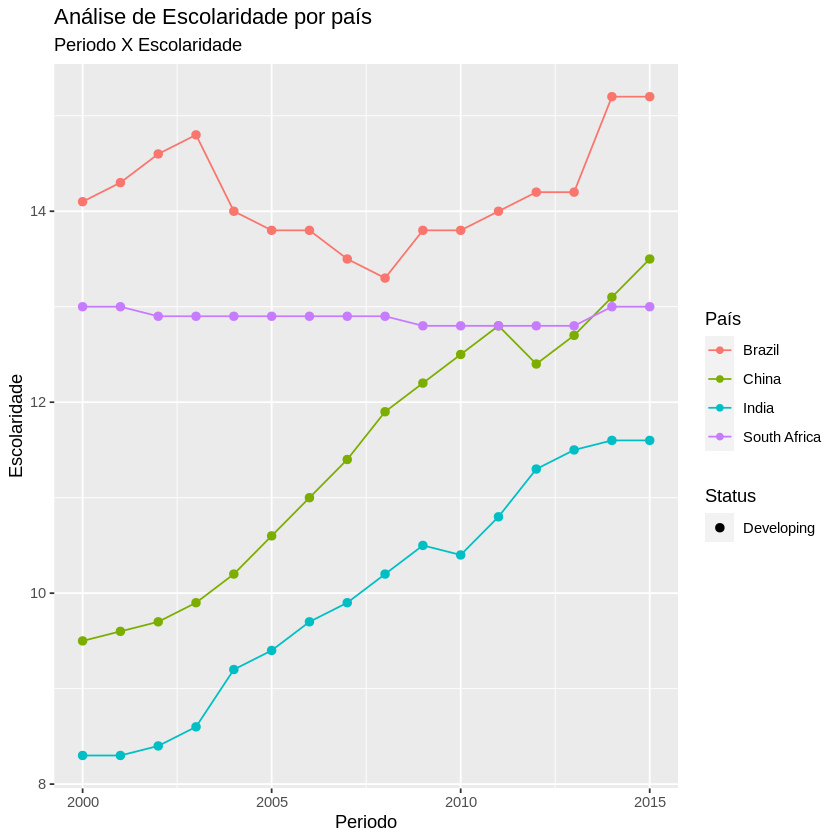

In [129]:
#Gráfico sobre a escolaridade dos países do BRICS
  ggplot(df_paises) +
  geom_line(aes(x = Year, y = Schooling, group = Country, col = Country))+
  geom_point(aes(x = Year, y = Schooling, group = Country, col = Country, size = Status))+
  ggtitle("Análise de Escolaridade por país", subtitle="Periodo X Escolaridade") +
  xlab("Periodo") +
  ylab("Escolaridade") +
  scale_color_discrete(name = "País")


Na escolaridade a Africa do Sul apresenta uma variação de queda discreta, China e India apresenta um crescimento. O Brasil, apesar de ter maior escolaridade, apresenta crescimento de 2001 a 2003, de 2004 a 2008 apresenta queda a cada ano. A partir de 2009 apresenta crescimento.

Warning message:
“Using size for a discrete variable is not advised.”


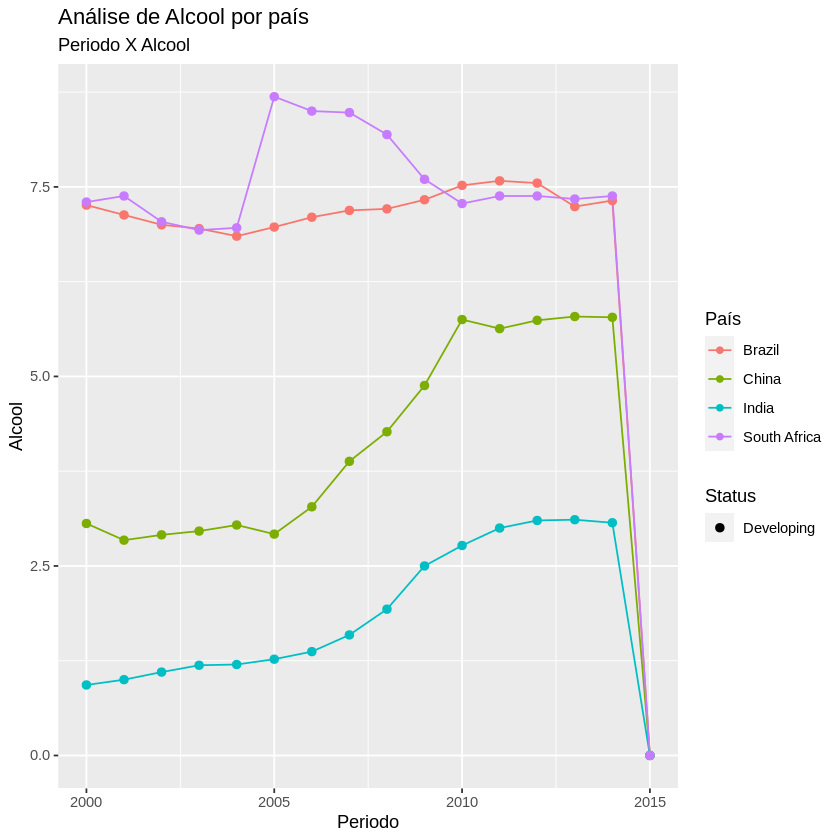

In [117]:
  #gráfico sobre o Alcool
  ggplot(df_paises) +
  geom_line(aes(x = Year, y = Alcohol, group = Country, col = Country))+
  geom_point(aes(x = Year, y = Alcohol, group = Country, col = Country, size = Status))+
  ggtitle("Análise de Alcool por país", subtitle="Periodo X Alcool") +
  xlab("Periodo") +
  ylab("Alcool") +
  scale_color_discrete(name = "País")


A China e India apresenta um crescimento do alcool. Africa do Sul e Brasil de 2000 a 2004, há uma queda. A partir de Africa do Sul tem um crescimento abrupto e depois começa a cair. O Brasil há há um crescimento a cada ano até 2012. 2013 há uma queda e 2014 há um leve crescimento.

Warning message:
“Using size for a discrete variable is not advised.”


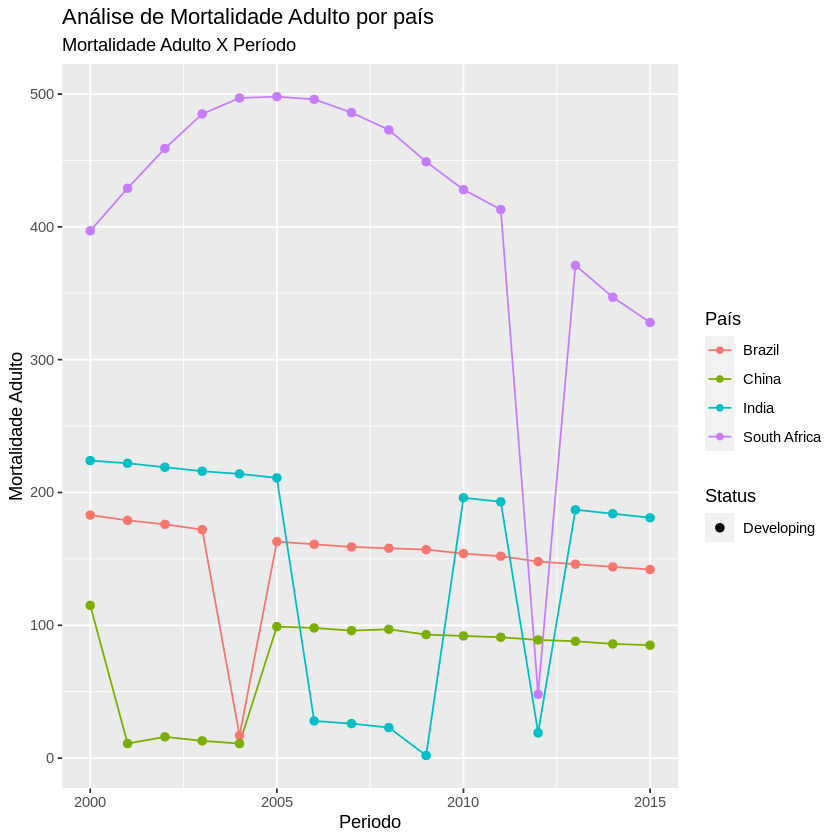

In [130]:
 #Grafico sobre a mortalidade de adulto
  ggplot(df_paises) +
  geom_line(aes(x = Year, y = Adult.Mortality, group = Country, col = Country))+
  geom_point(aes(x = Year, y = Adult.Mortality, group = Country, col = Country, size = Status))+
  ggtitle("Análise de Mortalidade Adulto por país", subtitle="Mortalidade Adulto X Período") +
  xlab("Periodo") +
  ylab("Mortalidade Adulto")+
  scale_color_discrete(name = "País")

Sobre a mortalidade de adultos Brasil, China e India apresentam quedas na mortalidade de adultos. A Africa do Sul de 2000 a 2004 apresenta crescimento da mortalidade de adultos manteve em 2005 e começa a cair a partir de 2006.

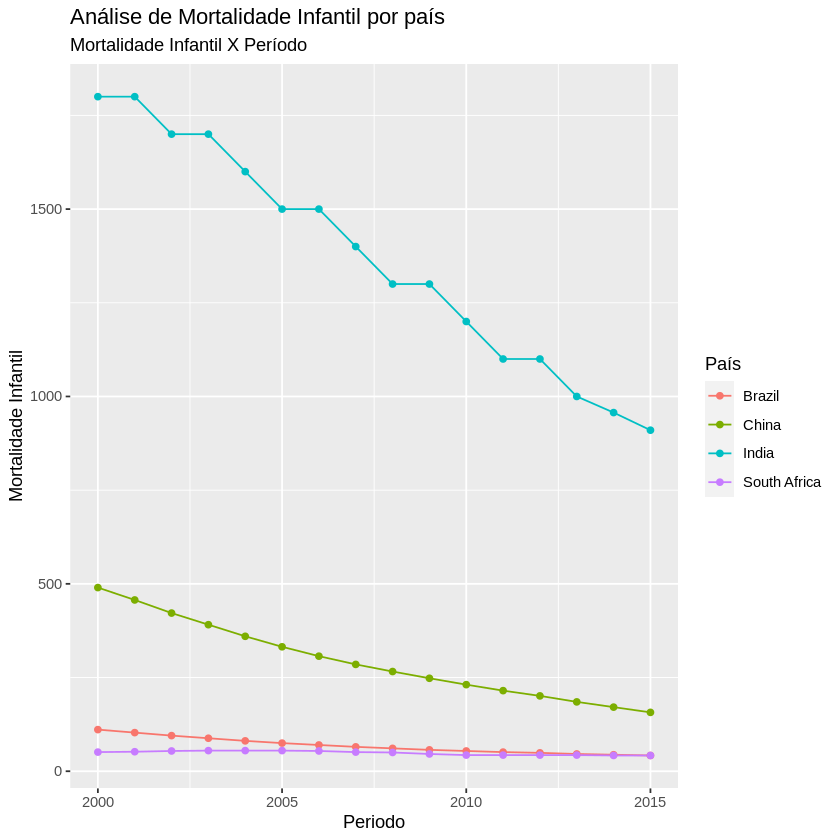

In [131]:
# Grafico mortalidade infantil
  ggplot(df_paises) +
  geom_line(aes(x = Year, y = infant.deaths, group = Country, col = Country))+
  geom_point(aes(x = Year, y = infant.deaths, group  = Country, col = Country)) +
    scale_color_discrete(name = "País")+
    ggtitle("Análise de Mortalidade Infantil por país", subtitle="Mortalidade Infantil X Período") +
  xlab("Periodo") +
  ylab("Mortalidade Infantil")

Africa do Sul apresenta o menor índice de mortalidade infantil e a India o maior indice de mortalidade infantil. Os 4(quatro) países apresentaram queda na mortalidade infantil

In [134]:
df_paises%>%filter(Country == 'South Africa')

Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,Schooling,GDP,Population,BMI,Proporcao_Morte_Adulto,Proporcao_Morte_Infantil
<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
South Africa,2015,Developing,62.9,328,42,0.00,13.0,5769.7726,5511976.68,51.1,0.0328,0.0042
South Africa,2014,Developing,62.0,347,42,7.38,13.0,6479.6257,54146734.74,5.3,0.0347,0.0042
South Africa,2013,Developing,69.0,371,43,7.34,12.8,6876.9538,53311955.61,49.5,0.0371,0.0043
South Africa,2012,Developing,59.2,48,43,7.38,12.8,7548.1637,5256515.80,48.7,0.0048,0.0043
South Africa,2011,Developing,58.9,413,43,7.38,12.8,849.9542,51729345.36,47.9,0.0413,0.0043
South Africa,2010,Developing,58.0,428,43,7.28,12.8,7362.7614,5979432.36,47.2,0.0428,0.0043
South Africa,2009,Developing,56.5,449,46,7.60,12.8,5888.6284,5255813.11,46.4,0.0449,0.0046
South Africa,2008,Developing,55.3,473,50,8.19,12.9,5786.5997,49557573.30,45.7,0.0473,0.0050
South Africa,2007,Developing,54.5,486,51,8.48,12.9,6125.3998,48883844.99,45.0,0.0486,0.0051


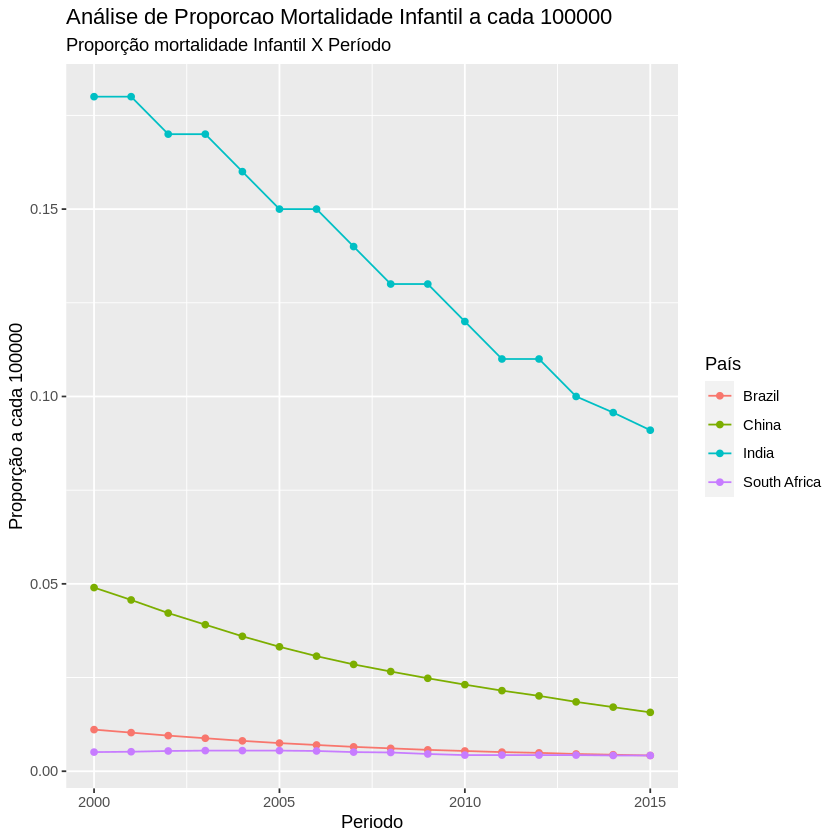

In [82]:
  ggplot(df_paises) +
  geom_line(aes(x = Year, y = Proporcao_Morte_Infantil, group = Country, col = Country))+
  geom_point(aes(x = Year, y = Proporcao_Morte_Infantil, group  = Country, col = Country)) +
    scale_color_discrete(name = "País")+
    ggtitle("Análise de Proporcao Mortalidade Infantil a cada 10.000", subtitle="Proporção mortalidade Infantil X Período") +
  xlab("Periodo") +
  ylab("Proporção a cada 10.000")

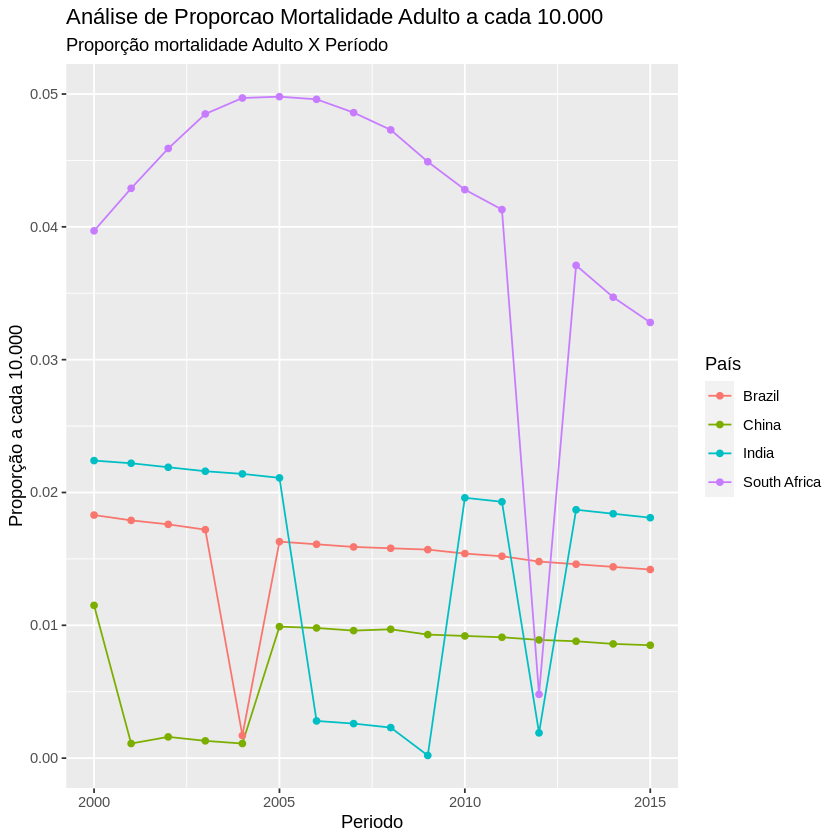

In [83]:
  ggplot(df_paises) +
  geom_line(aes(x = Year, y = Proporcao_Morte_Adulto , group = Country, col = Country))+
  geom_point(aes(x = Year, y = Proporcao_Morte_Adulto, group  = Country, col = Country)) +
    scale_color_discrete(name = "País")+
    ggtitle("Análise de Proporcao Mortalidade Adulto a cada 10.000", subtitle="Proporção mortalidade Adulto X Período") +
  xlab("Periodo") +
  ylab("Proporção a cada 10.000")

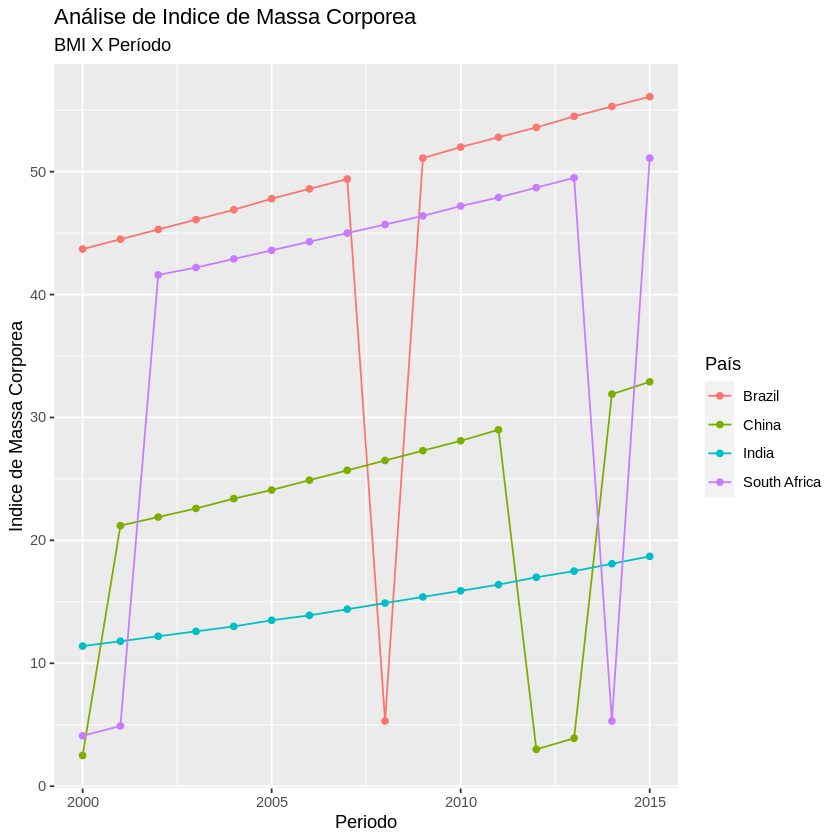

In [96]:
  ggplot(df_paises) +
  geom_line(aes(x = Year, y = BMI , group = Country, col = Country))+
  geom_point(aes(x = Year, y = BMI, group  = Country, col = Country)) +
    scale_color_discrete(name = "País")+
    ggtitle("Análise de Indice de Massa Corporea", subtitle="BMI X Período") +
  xlab("Periodo") +
  ylab("Indice de Massa Corporea")